In [1]:
import pandas as pd
import numpy as np
import fbprophet as ph
import matplotlib.pyplot as plt
import datetime
%matplotlib inline 

In [108]:
folderName  = "datasets"
fileName = "RefBldgHospitalNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv"
dataSource = folderName + "/" + fileName
print(dataSource)

datasets/RefBldgHospitalNew2004_7.1_5.0_3C_USA_CA_SAN_FRANCISCO.csv


In [111]:
dataset = pd.read_csv(dataSource)

In [110]:
dataset.shape

(8760, 11)

In [5]:
dataset.head(5)

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,778.007969,102.087533,409.661494,0.0,34.961655,113.31278,645.486394,631.103360,5.66467,8.718364
1,01/01 02:00:00,776.241750,102.087533,412.574797,0.0,34.961655,113.31278,658.620281,635.539107,5.66467,17.416503
2,01/01 03:00:00,779.357338,102.087533,412.809061,0.0,34.961655,113.31278,667.231362,644.151710,5.66467,17.414982
3,01/01 04:00:00,778.737196,102.087533,410.759535,0.0,34.961655,113.31278,667.086263,652.702863,5.66467,8.718730
4,01/01 05:00:00,787.835835,102.087533,406.741771,0.0,44.493766,113.31278,675.246367,652.164626,5.66467,17.417071


In [6]:
dataset.tail()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
8755,12/31 20:00:00,845.563081,102.087533,427.701530,0.0,44.493766,155.957040,564.589765,490.528152,56.646700,17.414913
8756,12/31 21:00:00,827.530521,102.087533,442.143380,0.0,44.493766,124.558693,595.894255,530.528860,56.646700,8.718695
8757,12/31 22:00:00,829.256300,102.087533,446.967345,0.0,44.493766,124.558693,605.592228,545.690220,42.485025,17.416983
8758,12/31 23:00:00,813.937205,102.087533,442.520037,0.0,34.961655,124.558693,610.512442,564.773749,28.323350,17.415343
8759,12/31 24:00:00,815.588584,102.087533,442.359770,0.0,34.961655,124.558693,590.079821,567.199220,14.161675,8.718926


In [7]:
dataset.columns
# Note : Ds = Date, y = Views

Index([u'Date/Time', u'Electricity:Facility [kW](Hourly)',
       u'Fans:Electricity [kW](Hourly)', u'Cooling:Electricity [kW](Hourly)',
       u'Heating:Electricity [kW](Hourly)',
       u'InteriorLights:Electricity [kW](Hourly)',
       u'InteriorEquipment:Electricity [kW](Hourly)',
       u'Gas:Facility [kW](Hourly)', u'Heating:Gas [kW](Hourly)',
       u'InteriorEquipment:Gas [kW](Hourly)',
       u'Water Heater:WaterSystems:Gas [kW](Hourly)'],
      dtype='object')

In [14]:
dataset = dataset[['Date/Time', 'Electricity:Facility [kW](Hourly)', 'Gas:Facility [kW](Hourly)']]

In [15]:
df_electric = dataset[['Date/Time', 'Electricity:Facility [kW](Hourly)']]

In [16]:
df_gas = dataset[['Date/Time',  'Gas:Facility [kW](Hourly)']]

In [19]:
#Renaming Columns for simplicity
df_electric.rename(columns={'Date/Time': 'ds', 'Electricity:Facility [kW](Hourly)': 'y'}, inplace=True)
df_gas.rename(columns={'Date/Time': 'ds', 'Gas:Facility [kW](Hourly)': 'y'}, inplace=True)

In [18]:
df_electric

,ds,y
0,01/01 01:00:00,778.007969
1,01/01 02:00:00,776.241750
2,01/01 03:00:00,779.357338
3,01/01 04:00:00,778.737196
4,01/01 05:00:00,787.835835
5,01/01 06:00:00,786.181354
6,01/01 07:00:00,853.508881
7,01/01 08:00:00,859.135138
8,01/01 09:00:00,928.745915
9,01/01 10:00:00,918.674958


In [20]:
# Note This dataset belong to year 2004 
# If you try to use the "Ds" column as "datetime you will get the following error:
# Try:    df['Ds'] = pd.to_datetime(df['Ds'])
# Error:  OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-01-01 01:00:00
#
# So we need to change this date properly to set the year.
# .index.map(lambda t: t.replace(year=2004))
#df['Ds'] = df['Ds'].replace(year=2004)

 
def modify_date(row):
    return row[:6] + '/2004' + row[6:].replace('24:', '00:')

In [21]:
df_electric['ds'] = df_electric['ds'].apply(modify_date)
df_gas['ds'] = df_gas['ds'].apply(modify_date)

/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [25]:
print(df_gas['ds'].head())
print(df_gas['ds'].tail())

0     01/01/2004  01:00:00
1     01/01/2004  02:00:00
2     01/01/2004  03:00:00
3     01/01/2004  04:00:00
4     01/01/2004  05:00:00
Name: ds, dtype: object
8755     12/31/2004  20:00:00
8756     12/31/2004  21:00:00
8757     12/31/2004  22:00:00
8758     12/31/2004  23:00:00
8759     12/31/2004  00:00:00
Name: ds, dtype: object


In [26]:
print(df_electric['ds'].head())
print(df_electric['ds'].tail())

0     01/01/2004  01:00:00
1     01/01/2004  02:00:00
2     01/01/2004  03:00:00
3     01/01/2004  04:00:00
4     01/01/2004  05:00:00
Name: ds, dtype: object
8755     12/31/2004  20:00:00
8756     12/31/2004  21:00:00
8757     12/31/2004  22:00:00
8758     12/31/2004  23:00:00
8759     12/31/2004  00:00:00
Name: ds, dtype: object


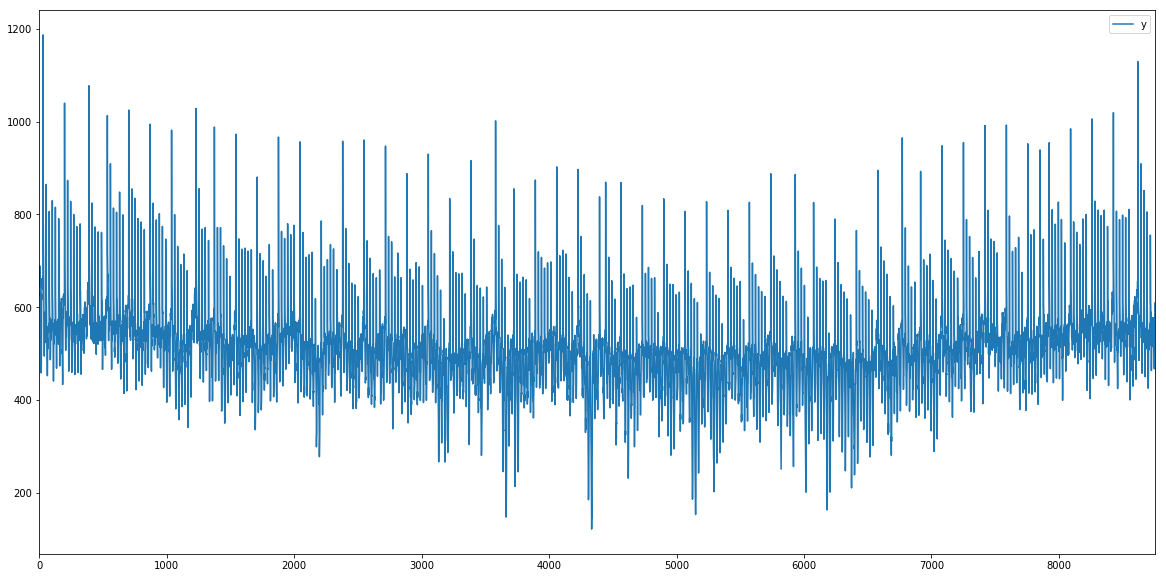

In [27]:
df_gas.plot(figsize  = (20,10))

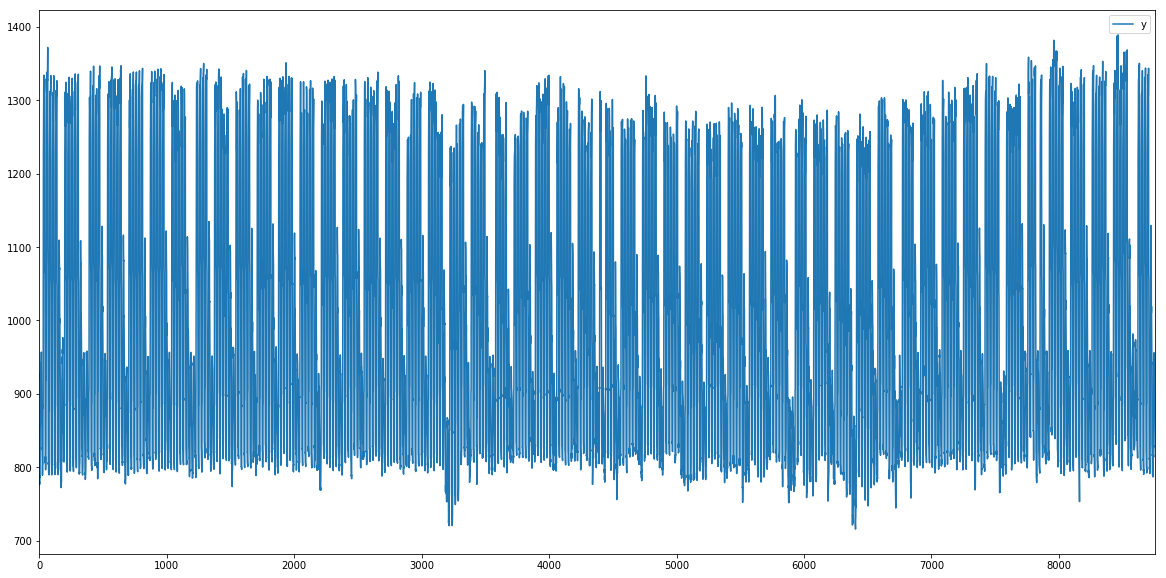

In [28]:
df_electric.plot(figsize  = (20,10))

In [32]:
df_gas['y'] = np.log(df_gas['y'])
print(np.power(np.e,df_gas['y'][0]))

6.47000413136


/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [34]:
df_electric['y'] = np.log(df_electric['y'])
print(np.power(np.e,df_electric['y'][0]))

778.007969062


/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [35]:
# Converting datetime values which are object to actual datetime
df_electric['ds'] = pd.to_datetime(df_electric['ds'])
df_gas['ds'] = pd.to_datetime(df_gas['ds'])

/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/avkash/.local/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
# Confirming date/time values for actual date/time type
print(df_electric['ds'].head())
print(df_gas['ds'].head())

0   2004-01-01 01:00:00
1   2004-01-01 02:00:00
2   2004-01-01 03:00:00
3   2004-01-01 04:00:00
4   2004-01-01 05:00:00
Name: ds, dtype: datetime64[ns]
0   2004-01-01 01:00:00
1   2004-01-01 02:00:00
2   2004-01-01 03:00:00
3   2004-01-01 04:00:00
4   2004-01-01 05:00:00
Name: ds, dtype: datetime64[ns]


In [74]:
# Selecting 11 months of data only to build the model and then testing how model predict for the remaining 12 month
df11_gas = df_gas[df_gas['ds'] < datetime.datetime(2004,12,1,0,0,0)]
df11_electric = df_electric[df_electric['ds'] < datetime.datetime(2004,12,1,0,0,0)]

In [75]:
print(df_gas.shape)
print(df11_gas.shape)
print(df_electric.shape)
print(df11_electric.shape)

(8760, 2)
(8016, 2)
(8760, 2)
(8016, 2)


In [76]:
# Training for gas first
m_gas = ph.Prophet()
m_gas.fit(df11_gas)

In [77]:
# Training for electric next
m_electric = ph.Prophet()
m_electric.fit(df11_electric)

In [78]:
m_gas.history

,ds,y,t,y_scaled
23,2004-01-01 00:00:00,1.870379,0.000000,0.955675
0,2004-01-01 01:00:00,1.867177,0.000124,0.954039
1,2004-01-01 02:00:00,1.870285,0.000249,0.955627
2,2004-01-01 03:00:00,1.872285,0.000373,0.956649
3,2004-01-01 04:00:00,1.872251,0.000498,0.956632
4,2004-01-01 05:00:00,1.874119,0.000622,0.957586
5,2004-01-01 06:00:00,1.877102,0.000746,0.959110
6,2004-01-01 07:00:00,1.861881,0.000871,0.951333
7,2004-01-01 08:00:00,1.863625,0.000995,0.952224
8,2004-01-01 09:00:00,1.850237,0.001120,0.945384


In [79]:
m_electric.history

,ds,y,t,y_scaled
23,2004-01-01 00:00:00,6.686370,0.000000,0.924675
0,2004-01-01 01:00:00,6.656737,0.000124,0.920577
1,2004-01-01 02:00:00,6.654464,0.000249,0.920263
2,2004-01-01 03:00:00,6.658470,0.000373,0.920817
3,2004-01-01 04:00:00,6.657674,0.000498,0.920707
4,2004-01-01 05:00:00,6.669290,0.000622,0.922313
5,2004-01-01 06:00:00,6.667187,0.000746,0.922023
6,2004-01-01 07:00:00,6.749356,0.000871,0.933386
7,2004-01-01 08:00:00,6.755926,0.000995,0.934295
8,2004-01-01 09:00:00,6.833835,0.001120,0.945069


In [85]:
future_gas = m_gas.make_future_dataframe(freq='H',periods=744) # Next 24x31 = 744 hours or 31 days
forecast_gas= m_gas.predict(future_gas)
forecast_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8755,2004-12-31 19:00:00,1.603447,1.505191,1.696296
8756,2004-12-31 20:00:00,1.603686,1.503103,1.697297
8757,2004-12-31 21:00:00,1.603925,1.509736,1.699253
8758,2004-12-31 22:00:00,1.604164,1.504175,1.695357
8759,2004-12-31 23:00:00,1.604403,1.506161,1.696361


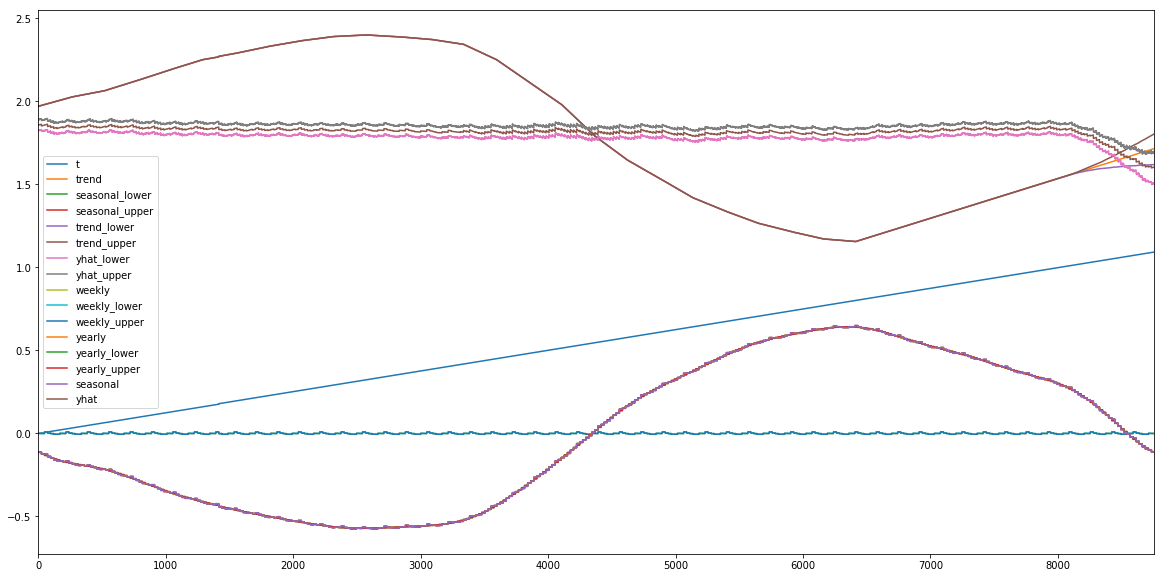

In [107]:
forecast_gas.plot(figsize= (20,10))

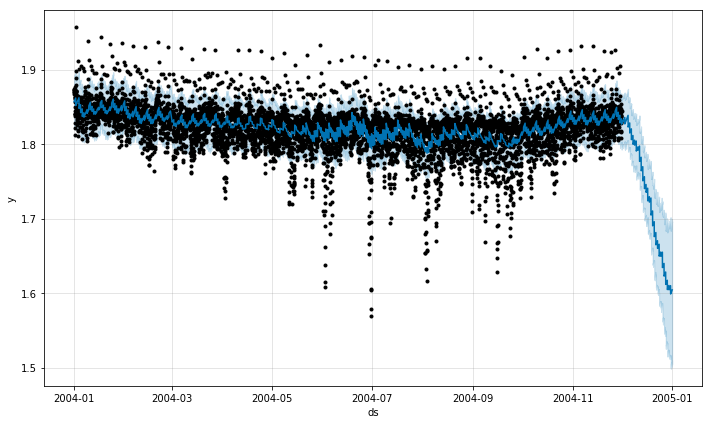

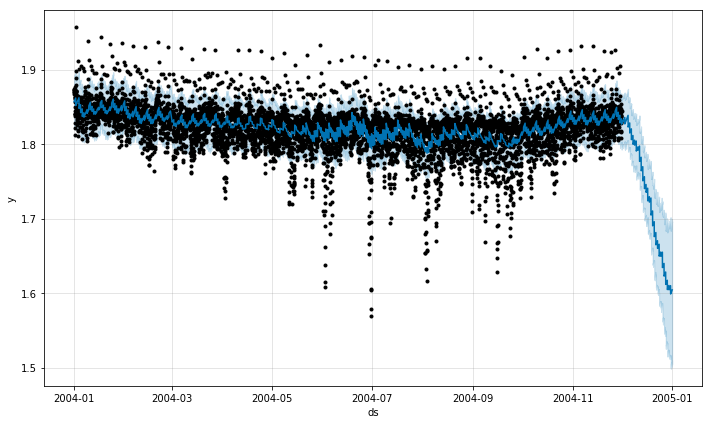

In [86]:
m_gas.plot(forecast_gas)

(8760, 17)
Index([u'ds', u't', u'trend', u'seasonal_lower', u'seasonal_upper',
       u'trend_lower', u'trend_upper', u'yhat_lower', u'yhat_upper', u'weekly',
       u'weekly_lower', u'weekly_upper', u'yearly', u'yearly_lower',
       u'yearly_upper', u'seasonal', u'yhat'],
      dtype='object')


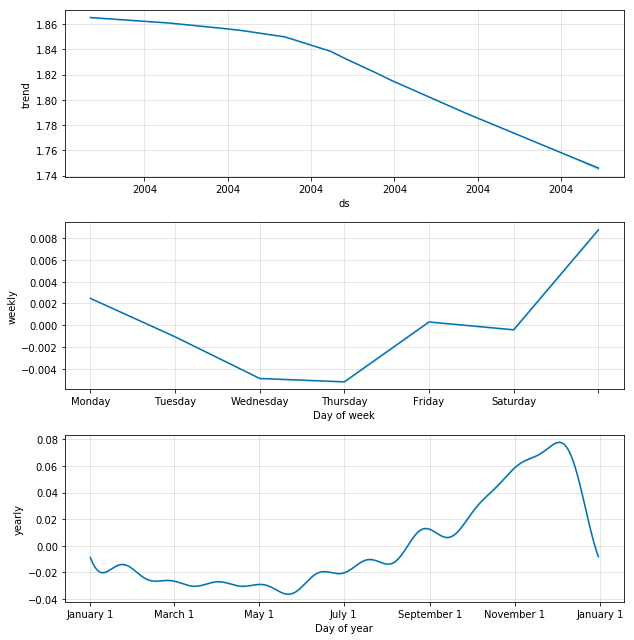

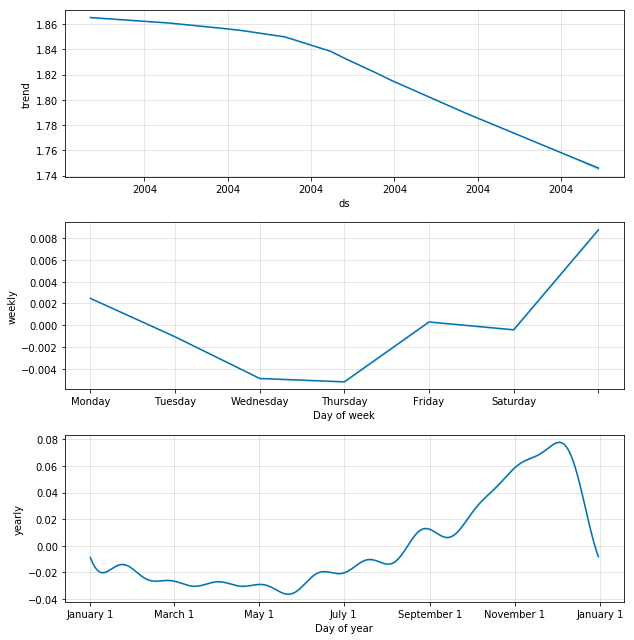

In [83]:
print(forecast_gas.shape)
print(forecast_gas.columns)
m_gas.plot_components(forecast_gas)

# Automatic changepoint detection in Prophet (Finding better scale)

If the trend changes are being overfit (too much flexibility) or underfit (not enough flexiblity), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale.

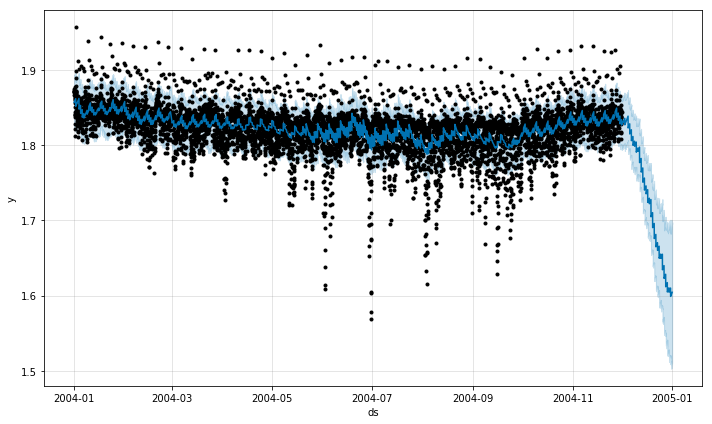

In [87]:
# Setting future for one month
future_gas_ch = m_gas.make_future_dataframe(freq='H', periods=744) # Next 31 days

#Now adjusting trends for the next month (31 days)
m_gas_ch = ph.Prophet(changepoint_prior_scale=0.5) # default is 0.5
forecast_gas_ch = m_gas_ch.fit(df11_gas).predict(future_gas_ch)
m_gas_ch.plot(forecast_gas_ch);

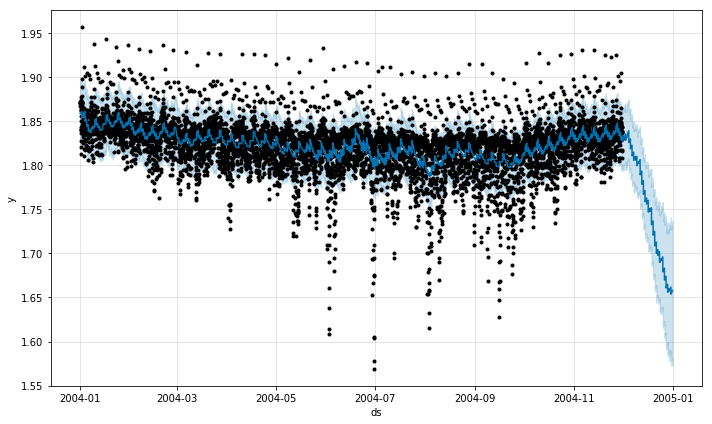

In [88]:
# Increasing changepoint_prior_scale values will make the trend more flexible:
m_gas_ch1 = ph.Prophet(changepoint_prior_scale=1)
forecast_gas_ch1 = m_gas_ch1.fit(df11_gas).predict(future_gas_ch)
m_gas_ch1.plot(forecast_gas_ch1);

# Finding better scale for gas utilization

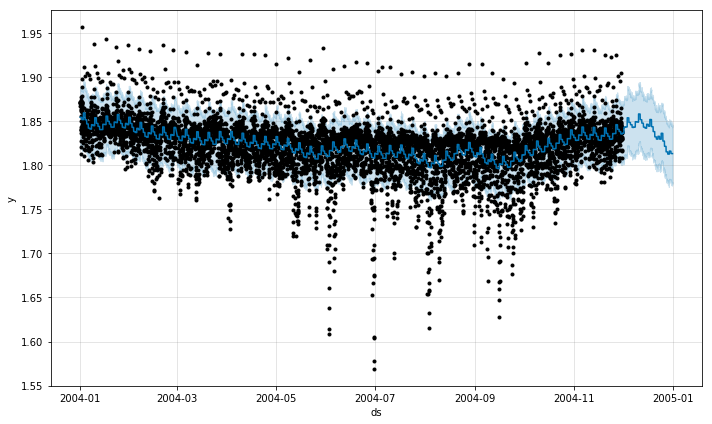

In [106]:
# Decreasing changepoint_prior_scale values will make the trend less flexible:
m_gas_ch001 = ph.Prophet(changepoint_prior_scale=0.001)
forecast_gas_ch001 = m_gas_ch001.fit(df11_gas).predict(future_gas_ch)
m_gas_ch001.plot(forecast_gas_ch001);

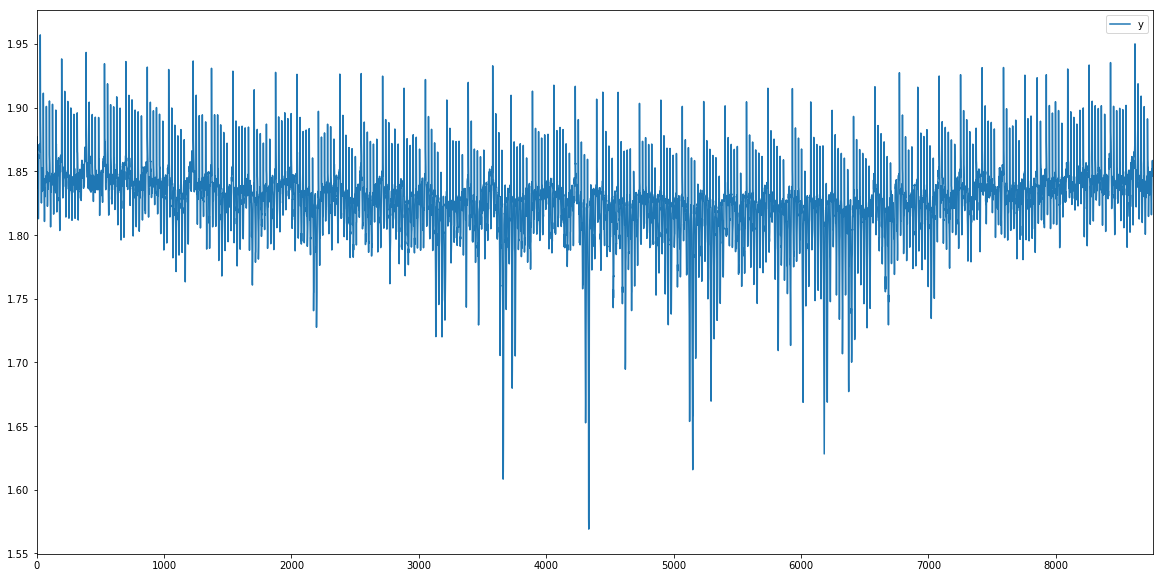

In [82]:
df_gas.plot(figsize  = (20,10))

# Working on electric utility

In [90]:
future_electric = m_electric.make_future_dataframe(freq='H',periods=744) # Next 24x31 = 744 hours or 31 days
forecast_electric= m_electric.predict(future_electric)
forecast_electric[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8755,2004-12-31 19:00:00,7.244614,7.031065,7.480807
8756,2004-12-31 20:00:00,7.244665,7.008841,7.474584
8757,2004-12-31 21:00:00,7.244715,7.006357,7.468973
8758,2004-12-31 22:00:00,7.244765,7.015343,7.485850
8759,2004-12-31 23:00:00,7.244815,7.007719,7.490789


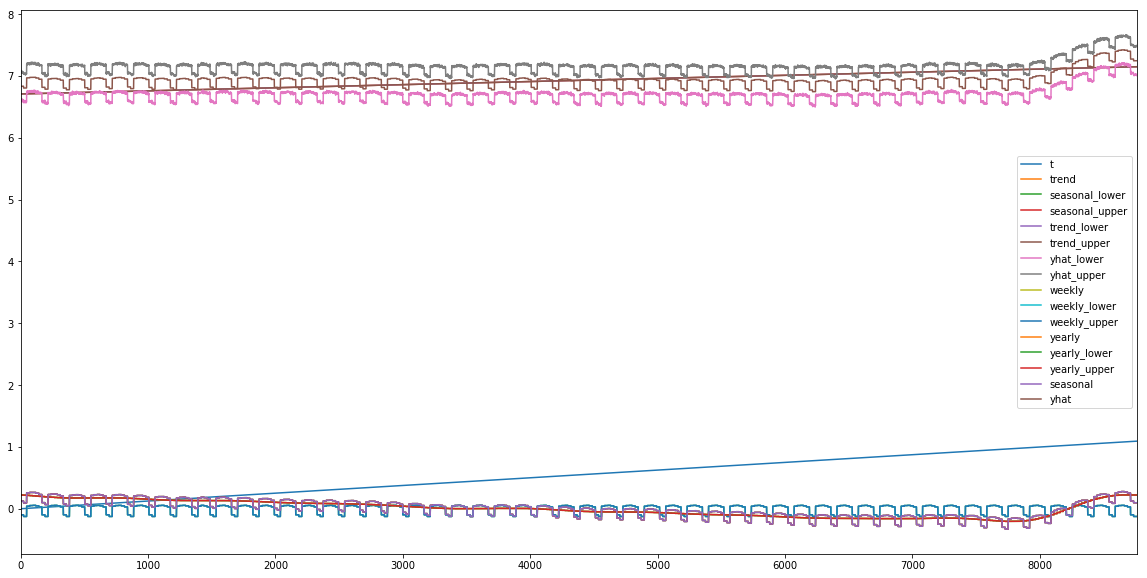

In [94]:
forecast_electric.plot(figsize = (20,10))

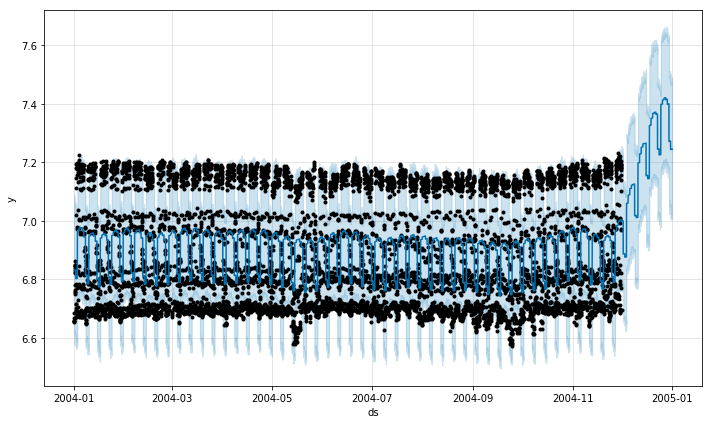

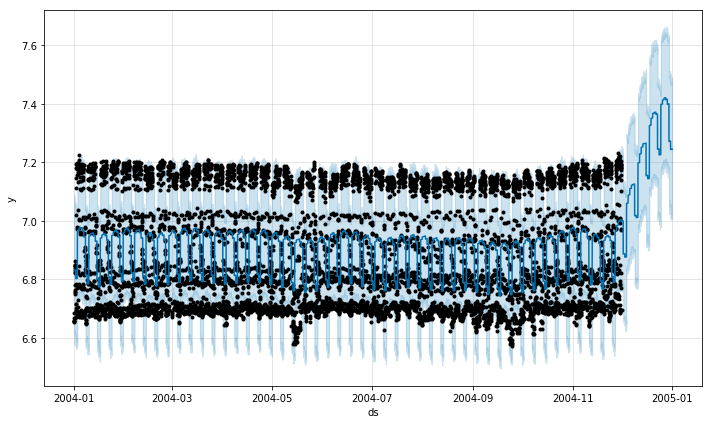

In [95]:
m_electric.plot(forecast_electric)

(8760, 17)
Index([u'ds', u't', u'trend', u'seasonal_lower', u'seasonal_upper',
       u'trend_lower', u'trend_upper', u'yhat_lower', u'yhat_upper', u'weekly',
       u'weekly_lower', u'weekly_upper', u'yearly', u'yearly_lower',
       u'yearly_upper', u'seasonal', u'yhat'],
      dtype='object')


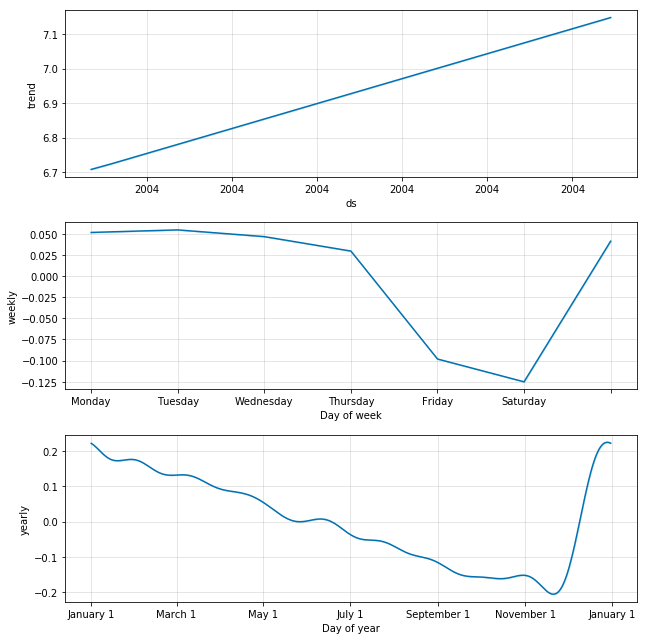

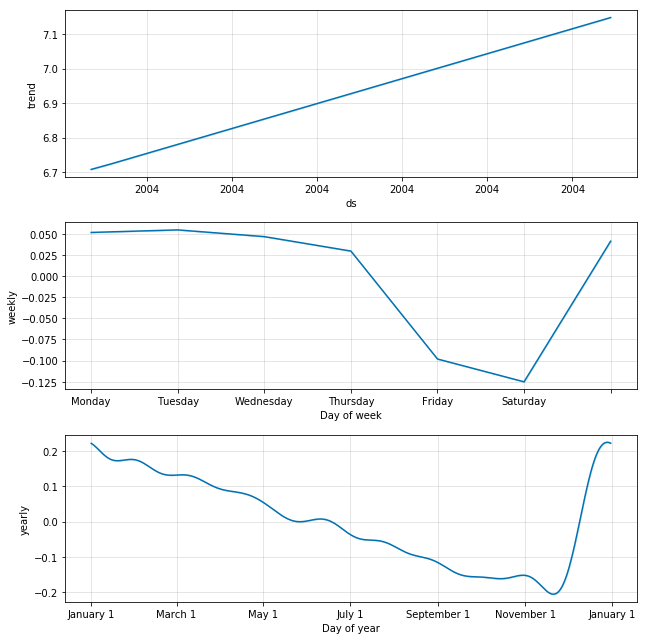

In [104]:
print(forecast_electric.shape)
print(forecast_electric.columns)
m_electric.plot_components(forecast_electric)

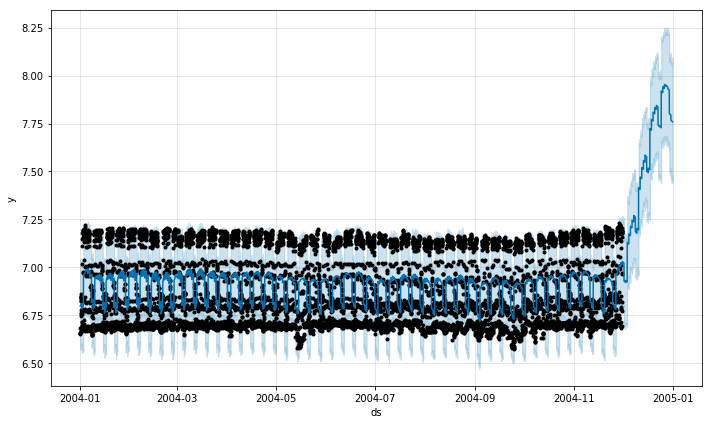

In [98]:
# Setting future for one year
future_electric_ch = m_electric.make_future_dataframe(freq='H', periods=744) # Next 5 days

#Now adjusting trends for the next month (31 days)
m_electric_ch = ph.Prophet(changepoint_prior_scale=0.5) # default is 0.5
forecast_electric_ch = m_electric_ch.fit(df11_electric).predict(future_electric_ch)
m_electric_ch.plot(forecast_electric_ch);

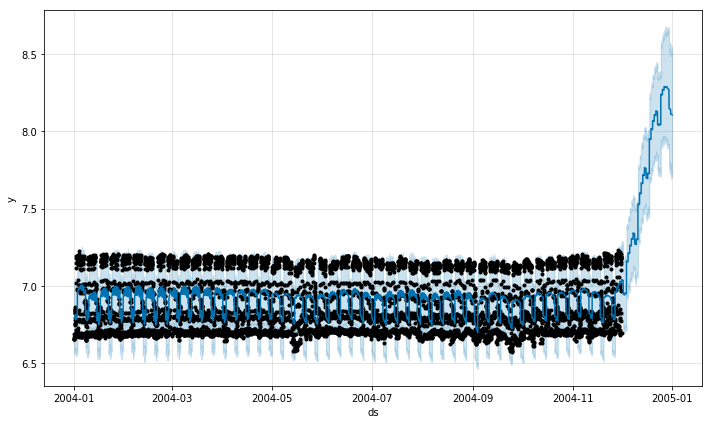

In [100]:
m_electric_ch1 = ph.Prophet(changepoint_prior_scale=1)
forecast_electric_ch1 = m_electric_ch1.fit(df11_electric).predict(future_electric_ch)
m_electric_ch1.plot(forecast_electric_ch1);

# Finding better scale for electric utilization

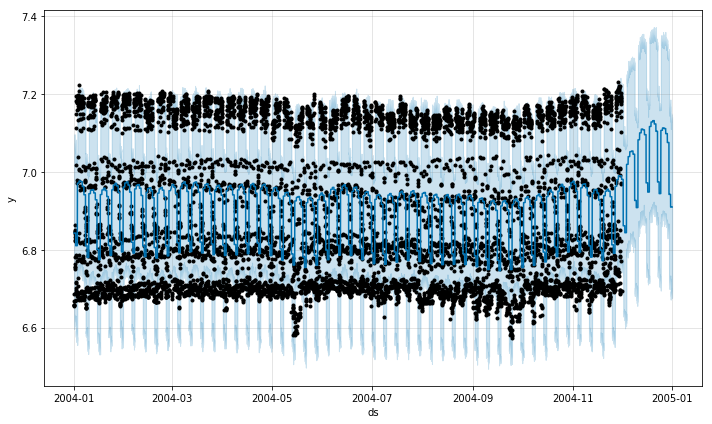

In [102]:
m_electric_ch001 = ph.Prophet(changepoint_prior_scale=0.001)
forecast_electric_ch001 = m_electric_ch001.fit(df11_electric).predict(future_electric_ch)
m_electric_ch001.plot(forecast_electric_ch001);

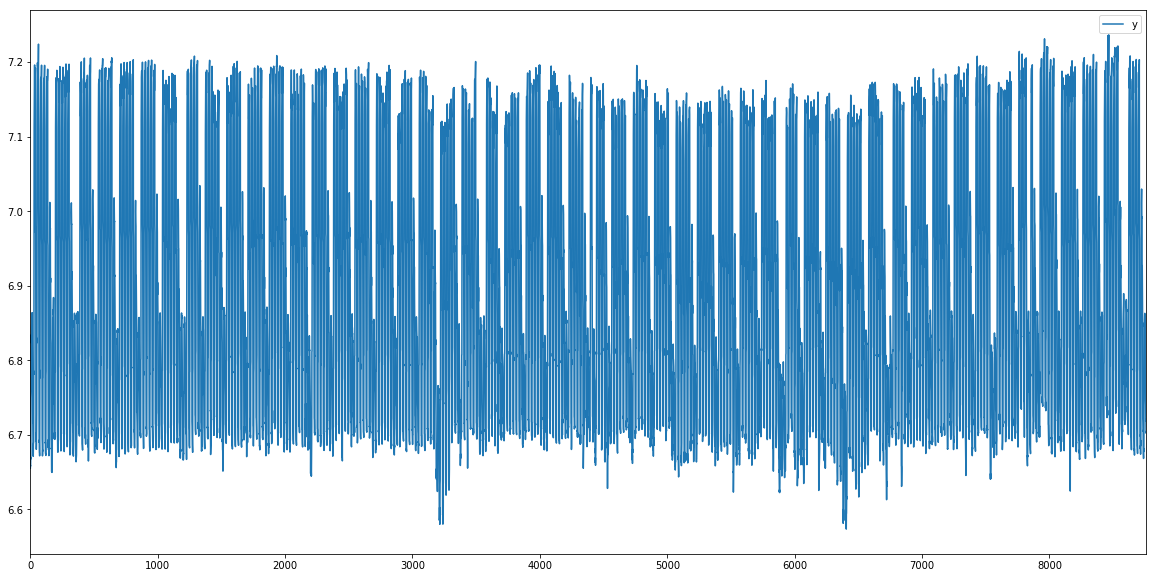

In [103]:
df_electric.plot(figsize  = (20,10))